<a href="https://colab.research.google.com/github/MaryamSayedGitHub/Maryam_Sayed_Ahmed-/blob/main/prediction_using_unsupervised_ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! kaggle datasets download -d arshid/iris-flower-dataset

iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
! unzip /content/iris-flower-dataset.zip

Archive:  /content/iris-flower-dataset.zip
replace IRIS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### **Import libraries ⛳**

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### **Upload Data ⚓**

In [21]:
data=pd.read_csv("/content/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **EDA: ☔**

### **Showing and handling Nulls ✂**

In [22]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### **Showing the categorical data and convert it to numerical ⚡**

In [23]:
#Show data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
data["species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2],inplace=True)
data["species"].unique()

array([0, 1, 2])

### Show Duplicate

In [26]:
data.duplicated().sum()

3

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.duplicated().sum()

0

### **Showing the Outliers and handling :**

<Axes: >

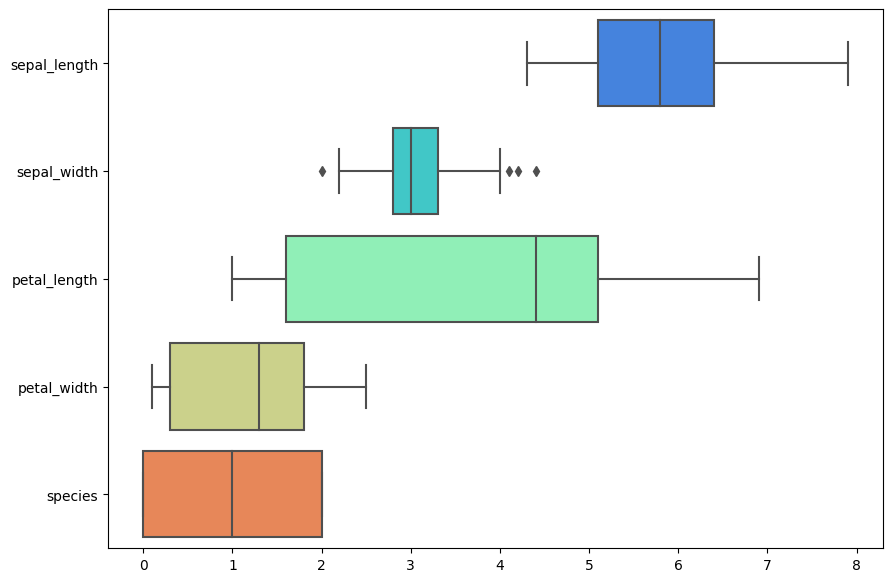

In [29]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=data,palette='rainbow',orient='h')

<Axes: >

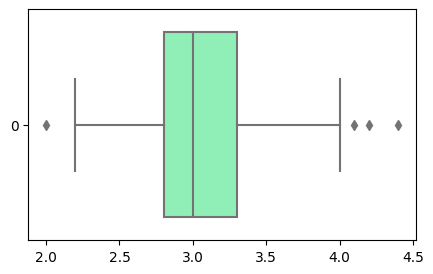

In [30]:
plt.subplots(figsize=(5,3))
sns.boxplot(data=data["sepal_width"],palette='rainbow',orient='h')

In [31]:
#Let's try get ride of outliers!
for x in ['sepal_width']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min

<Axes: >

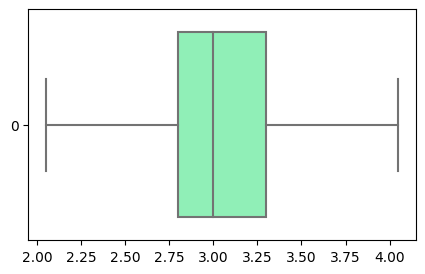

In [32]:
plt.subplots(figsize=(5,3))
sns.boxplot(data=data["sepal_width"],palette='rainbow',orient='h')

### **Some of Visualizations 🧮**

In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


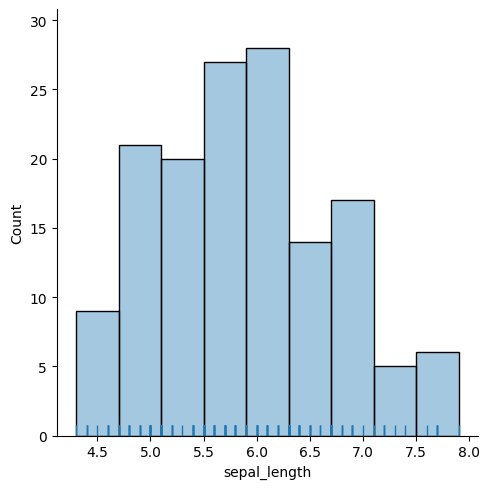

In [34]:
sns.displot(data, x="sepal_length", alpha=.4, rug=True)

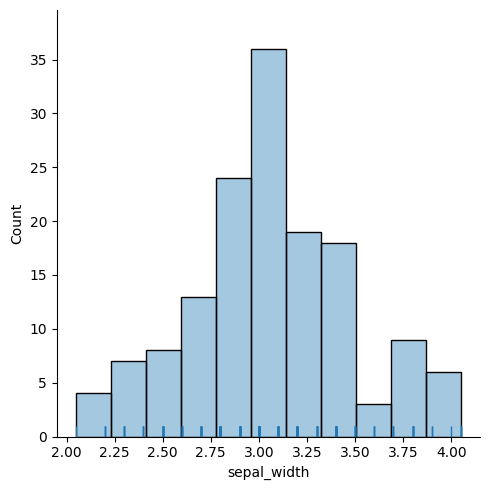

In [35]:
sns.displot(data, x="sepal_width", alpha=.4, rug=True)

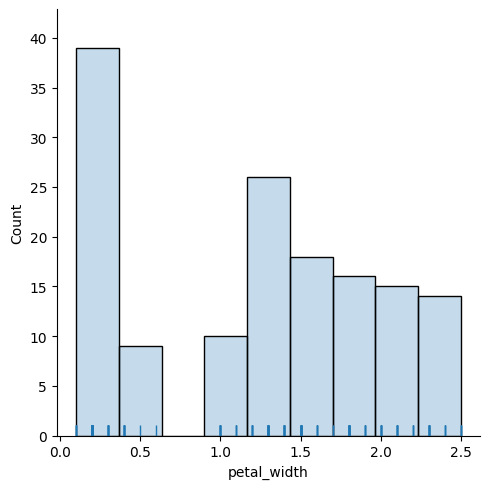

In [36]:
sns.displot(data, x="petal_width", alpha=0.26, rug=True)

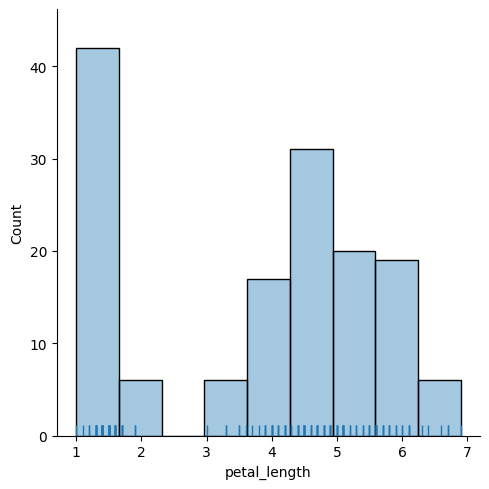

In [37]:
sns.displot(data, x="petal_length", alpha=.4, rug=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

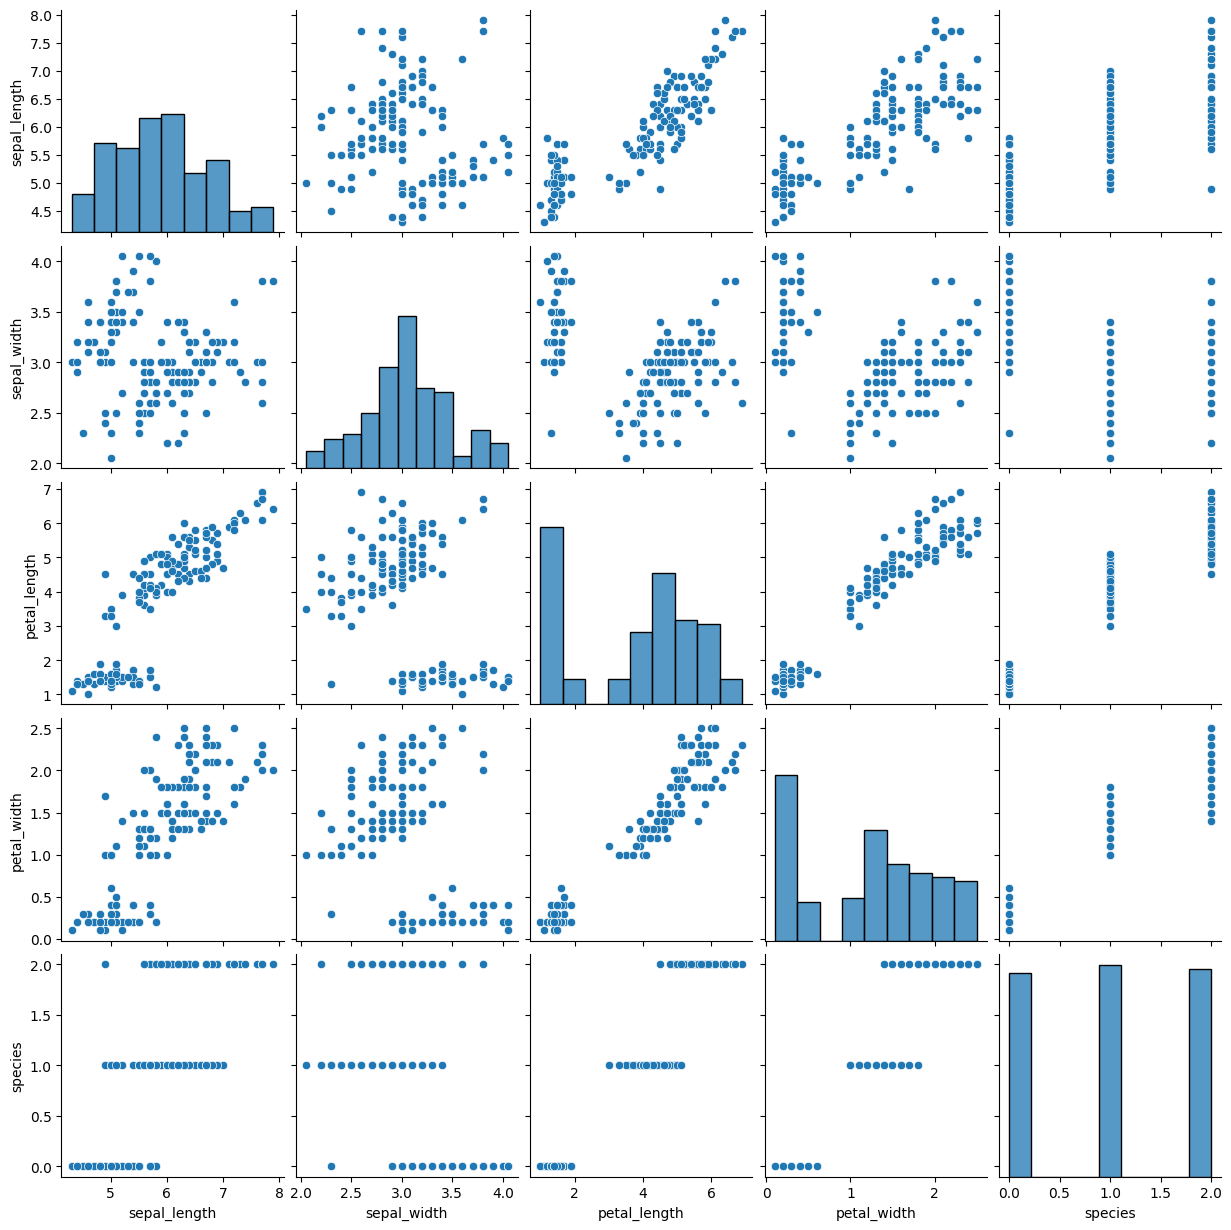

In [38]:
sns.pairplot(data,palette='coolwarm')

### **Clustering using K_Means **

In [39]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300,random_state=0)

In [40]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
y_predicted = kmeans.fit_predict(data[["sepal_length",	"sepal_width"	,"petal_width"	,"petal_length"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
data['Clusters'] = kmeans.labels_

In [43]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 2.07105263, 5.74210526],
       [5.01041667, 3.41979167, 0.25      , 1.4625    ],
       [5.90327869, 2.75      , 1.42622951, 4.38196721]])

### Before Clustering




<ipython-input-44-327a22fff710>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="sepal_length", y="sepal_width",  data=data,palette='viridis')


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

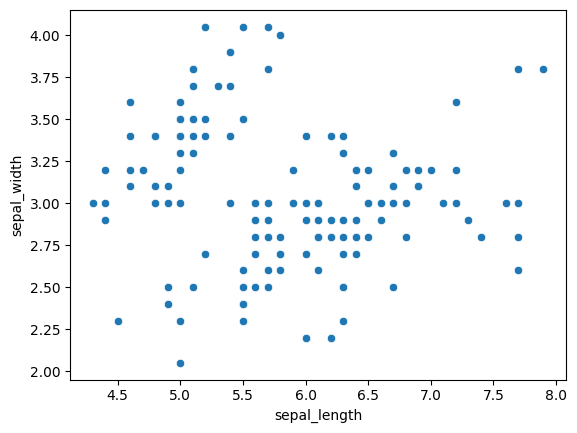

In [44]:
sns.scatterplot(x="sepal_length", y="sepal_width",  data=data,palette='viridis')

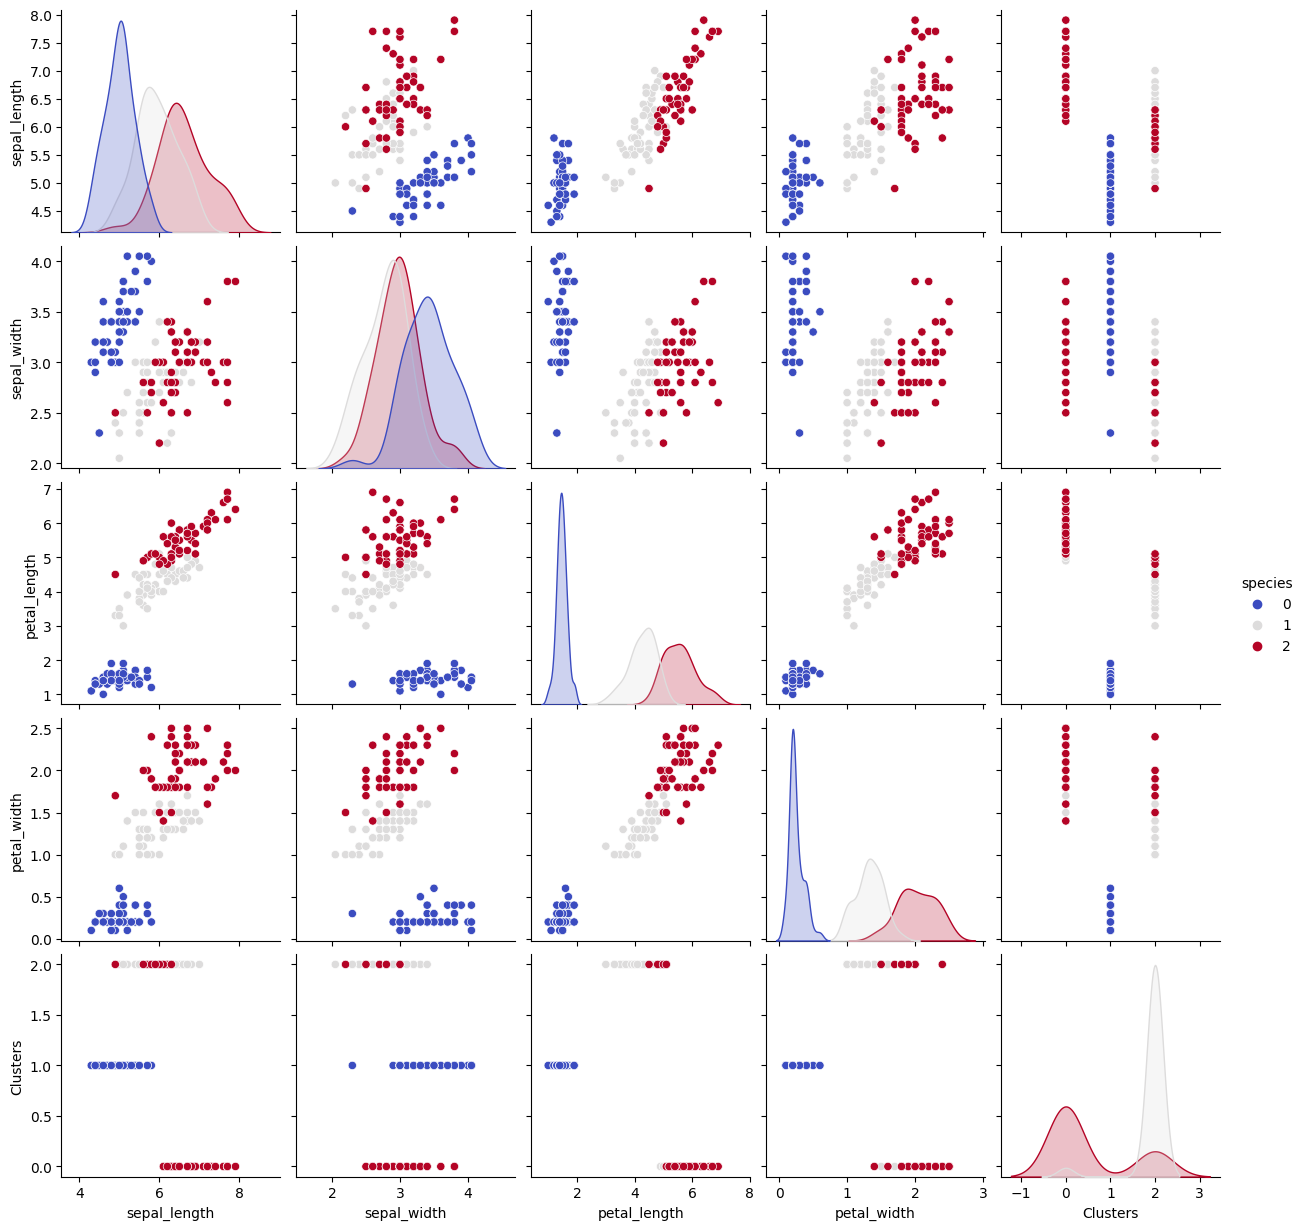

In [45]:
sns.pairplot(data,hue='species',palette='coolwarm')

### **After Clustering **

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

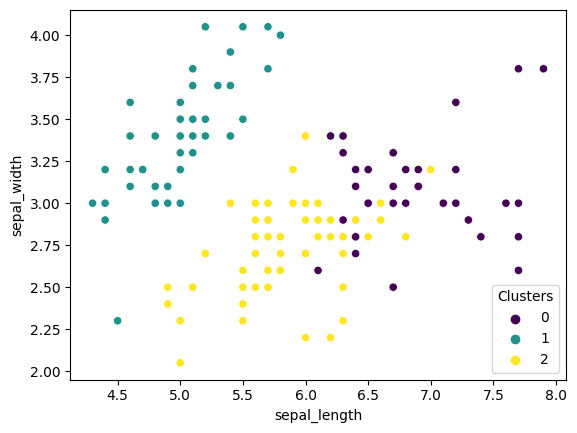

In [46]:
sns.scatterplot(x="sepal_length", y="sepal_width",  hue = 'Clusters',data=data,palette='viridis')

<Axes: xlabel='petal_length', ylabel='petal_width'>

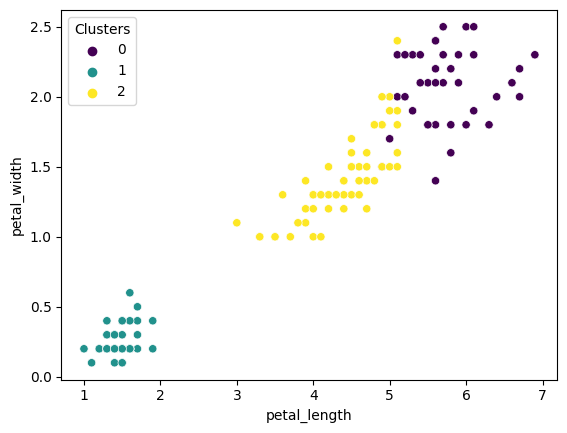

In [47]:
sns.scatterplot(x="petal_length", y="petal_width",hue = 'Clusters',  data=data,palette='viridis')

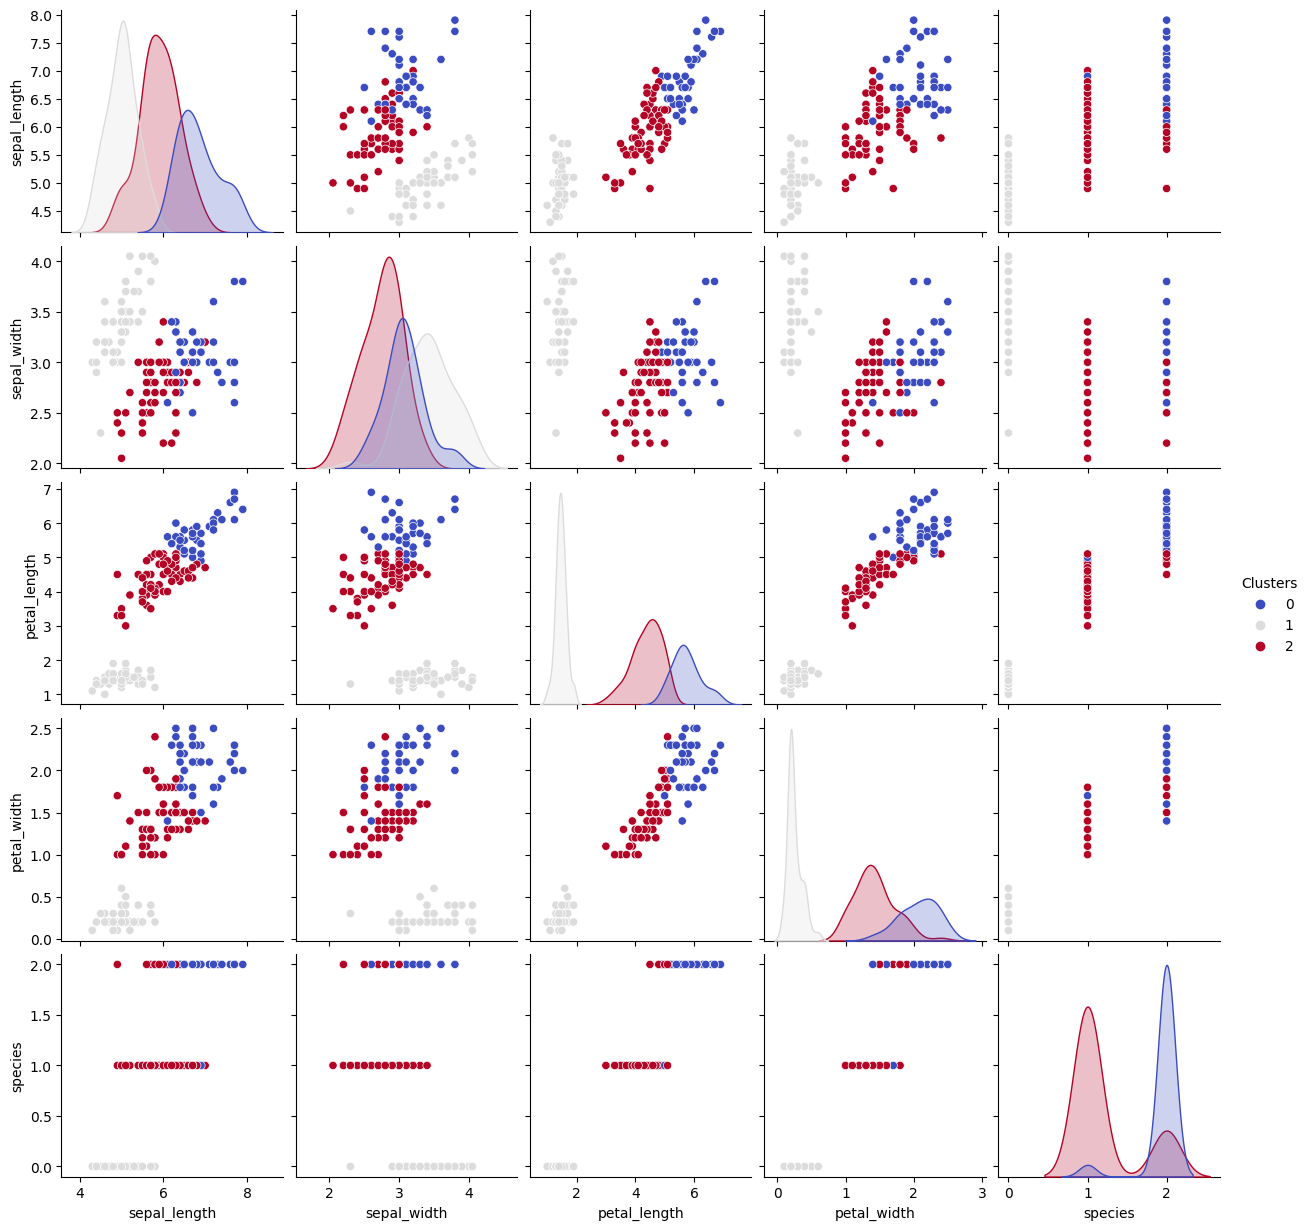

In [48]:
sns.pairplot(data,hue='Clusters',palette='coolwarm')

###** Show the best K-values using Elbow method **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

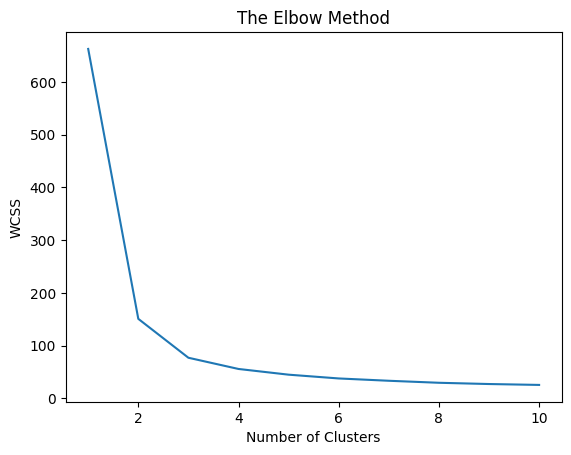

In [49]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data[["sepal_length",	"sepal_width"	,"petal_width"	,"petal_length"]])
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [51]:
data["Clusters"].replace([0,1,2],['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],inplace=True)
data["Clusters"].unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

<Axes: xlabel='petal_length', ylabel='petal_width'>

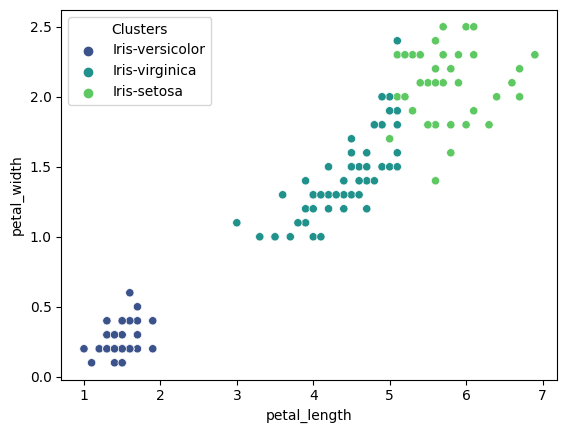

In [52]:
sns.scatterplot(x="petal_length", y="petal_width",hue = 'Clusters',  data=data,palette='viridis')

### **Thanks so much 🌳**


### **Waiting for your feedback 😊**